In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

2025-05-01 07:47:00.073265: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746085620.327270      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746085620.405407      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
Y_train = train_df['label'].astype('float32')
X_train = train_df.drop(['label'], axis=1).astype('int32')
X_test = test_df.astype('float32')

X_train = X_train/255
X_test = X_test/255

In [4]:
X_train.shape, X_test.shape

((42000, 784), (28000, 784))

In [5]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [6]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

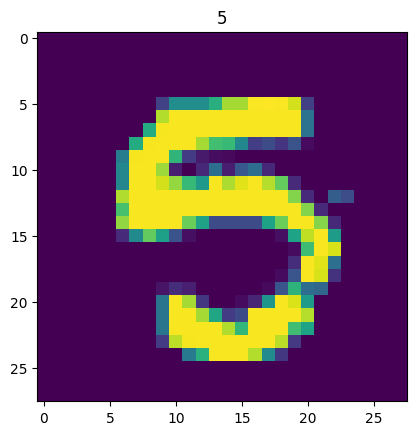

In [7]:
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

In [8]:
input_shape = (28,28,1)
X_input = Input(input_shape)
x = Conv2D(64,(3,3),strides=(1,1),name='layer_conv1',padding='same')(X_input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)

2025-05-01 07:47:21.086306: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [9]:
x = Conv2D(32,(3,3),strides=(1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

In [10]:
x = Conv2D(32,(3,3),strides=(1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2), name='maxPool3')(x)

In [11]:
x = Flatten()(x)
x = Dense(64,activation ='relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation ='relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation ='softmax',name='fc2')(x)

In [ ]:
model = Model(inputs=X_input, outputs=x, name='Predict')
sgd = SGD(learning_rate=0.0005, momentum=0.5, decay=0.0, nesterov=False) 
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=30, validation_data=(X_validation, Y_validation))

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.2858 - loss: 2.0838 - val_accuracy: 0.7710 - val_loss: 1.0454
Epoch 2/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.6136 - loss: 1.1993 - val_accuracy: 0.9110 - val_loss: 0.4943
Epoch 3/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 48s 41ms/step - accuracy: 0.7620 - loss: 0.7609 - val_accuracy: 0.9383 - val_loss: 0.2931
Epoch 4/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.8324 - loss: 0.5596 - val_accuracy: 0.9524 - val_loss: 0.2114
Epoch 5/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.8674 - loss: 0.4432 - val_accuracy: 0.9590 - val_loss: 0.1663
Epoch 6/30
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 47s 40ms/step - accuracy: 0.8886 - loss: 0.3675 - val_accuracy: 0.9631 - val_loss: 0.1422
Epoch 7/30
  77/1182 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9208 - loss: 0.2830

In [ ]:
prediction = model.predict(X_test)
prediction = np.argmax(prediction,axis=1)
submission = pd.DataFrame({'ImageId': list(range(1, len(Y_pred)+1)), 'Label': Y_pred})
submission.to_csv('/kaggle/working/submission.csv', index=False)